In [1]:
import os
import json
import numpy as np
import pandas as pd

In [2]:
df_ztfrest = pd.read_csv('ZTFReST.csv')
ztfredshifts = df_ztfrest.dropna(subset=["redshift"]).copy().reset_index(drop=True)

objIds = sorted(list(set(ztfredshifts["id"])))

In [3]:
data_folder = 'data/'
photometry_dict = {}


for root, dirs, files in sorted(os.walk(data_folder)):
    for file in files:
        if file == 'photometry.json':
            folder_name = os.path.basename(root)
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                photometry_dict[folder_name] = json.load(f)

In [4]:
lc_dict = {key: pd.DataFrame.from_dict(val) for key, val in photometry_dict.items()}

In [5]:
# Initialize an empty dictionary to store non-empty items
flc_dict = {}
elc_dict = {}

# Iterate over the items in lc_dict
for key, value in lc_dict.items():
    # Check if the value is not empty
    if not value.empty:
        # If the value is not empty, add it to the new dictionary
        flc_dict[key] = value
    else:
        # If the value is empty, print the key
        print(f"{key}")
        elc_dict[key] = value

# Now non_empty_lc_dict contains only the items from lc_dict that are not empty

print('number of non-empty lightcurves:', len(flc_dict))
print('number of empty lightcurves:', len(elc_dict))

194.94985-47.75
Swift-J002325.5-141701
Swift-J181727.0-192921
ZTF18abfcmjwm
ZTF18abianhw
ZTF18abukavnm
ZTF18abvkwlam
ZTF19aankdan
ZTF19aapuudk
ZTF19aasexmy
ZTF19abeyvoi
ZTF19abobxik
ZTF19abrpfps
ZTF19abuvqgw
ZTF19acaxbjt
ZTF19acayojs
ZTF19accxzsc
ZTF20aaelulum
ZTF20aazrcbp
ZTF20ababxjv
ZTF20abmocba
ZTF20acigmelm
ZTF22abvvmti
number of non-empty lightcurves: 190
number of empty lightcurves: 23


In [6]:
df_eval = pd.read_csv('candidateEval05-30.csv')
df_eval.head()

,Object,Classification,Captures rise in g,captures fade in g,Captures rise in r,captures fade in r,Has i band?,ztfg rise min/max,ztfg fade min/max,ztfr rise min/max,ztfr fade min/max,ztfi rise min/max,ztfi fade min/max,usable? (0-5),Misc Notes
0,ZTF18aakuewf,NaN,n,y,y,y,n,NaN,58225-58240,58225-58230,58230-58250,NaN,NaN,4,NaN
1,ZTF18aalrxas,NaN,y,y,n,n,n,NaN,NaN,NaN,NaN,NaN,NaN,3,lowish quality ztfr
2,ZTF18abantmh,NaN,n,n,n,n,n,NaN,NaN,NaN,NaN,NaN,NaN,0,low quality
3,ZTF18abffyqp,NaN,n,m,n,m,n,NaN,NaN,NaN,NaN,NaN,NaN,1,no peak
4,ZTF18abvkmgw,NaN,y,y,n,n,n,NaN,NaN,NaN,NaN,NaN,NaN,3,decent g


In [7]:
hq_cands = df_eval[df_eval['usable? (0-5)'] >= 4]
bflc_dict = {key: value for key, value in flc_dict.items() if key in hq_cands['Object'].values}

/tmp/ipykernel_155903/4072763600.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_time = value[(value['mag'].notnull())][(value['filter'] == 'ztfg') | (value['filter'] == 'ztfr') | (value['filter'] == 'ztfi')]['mjd'].min()


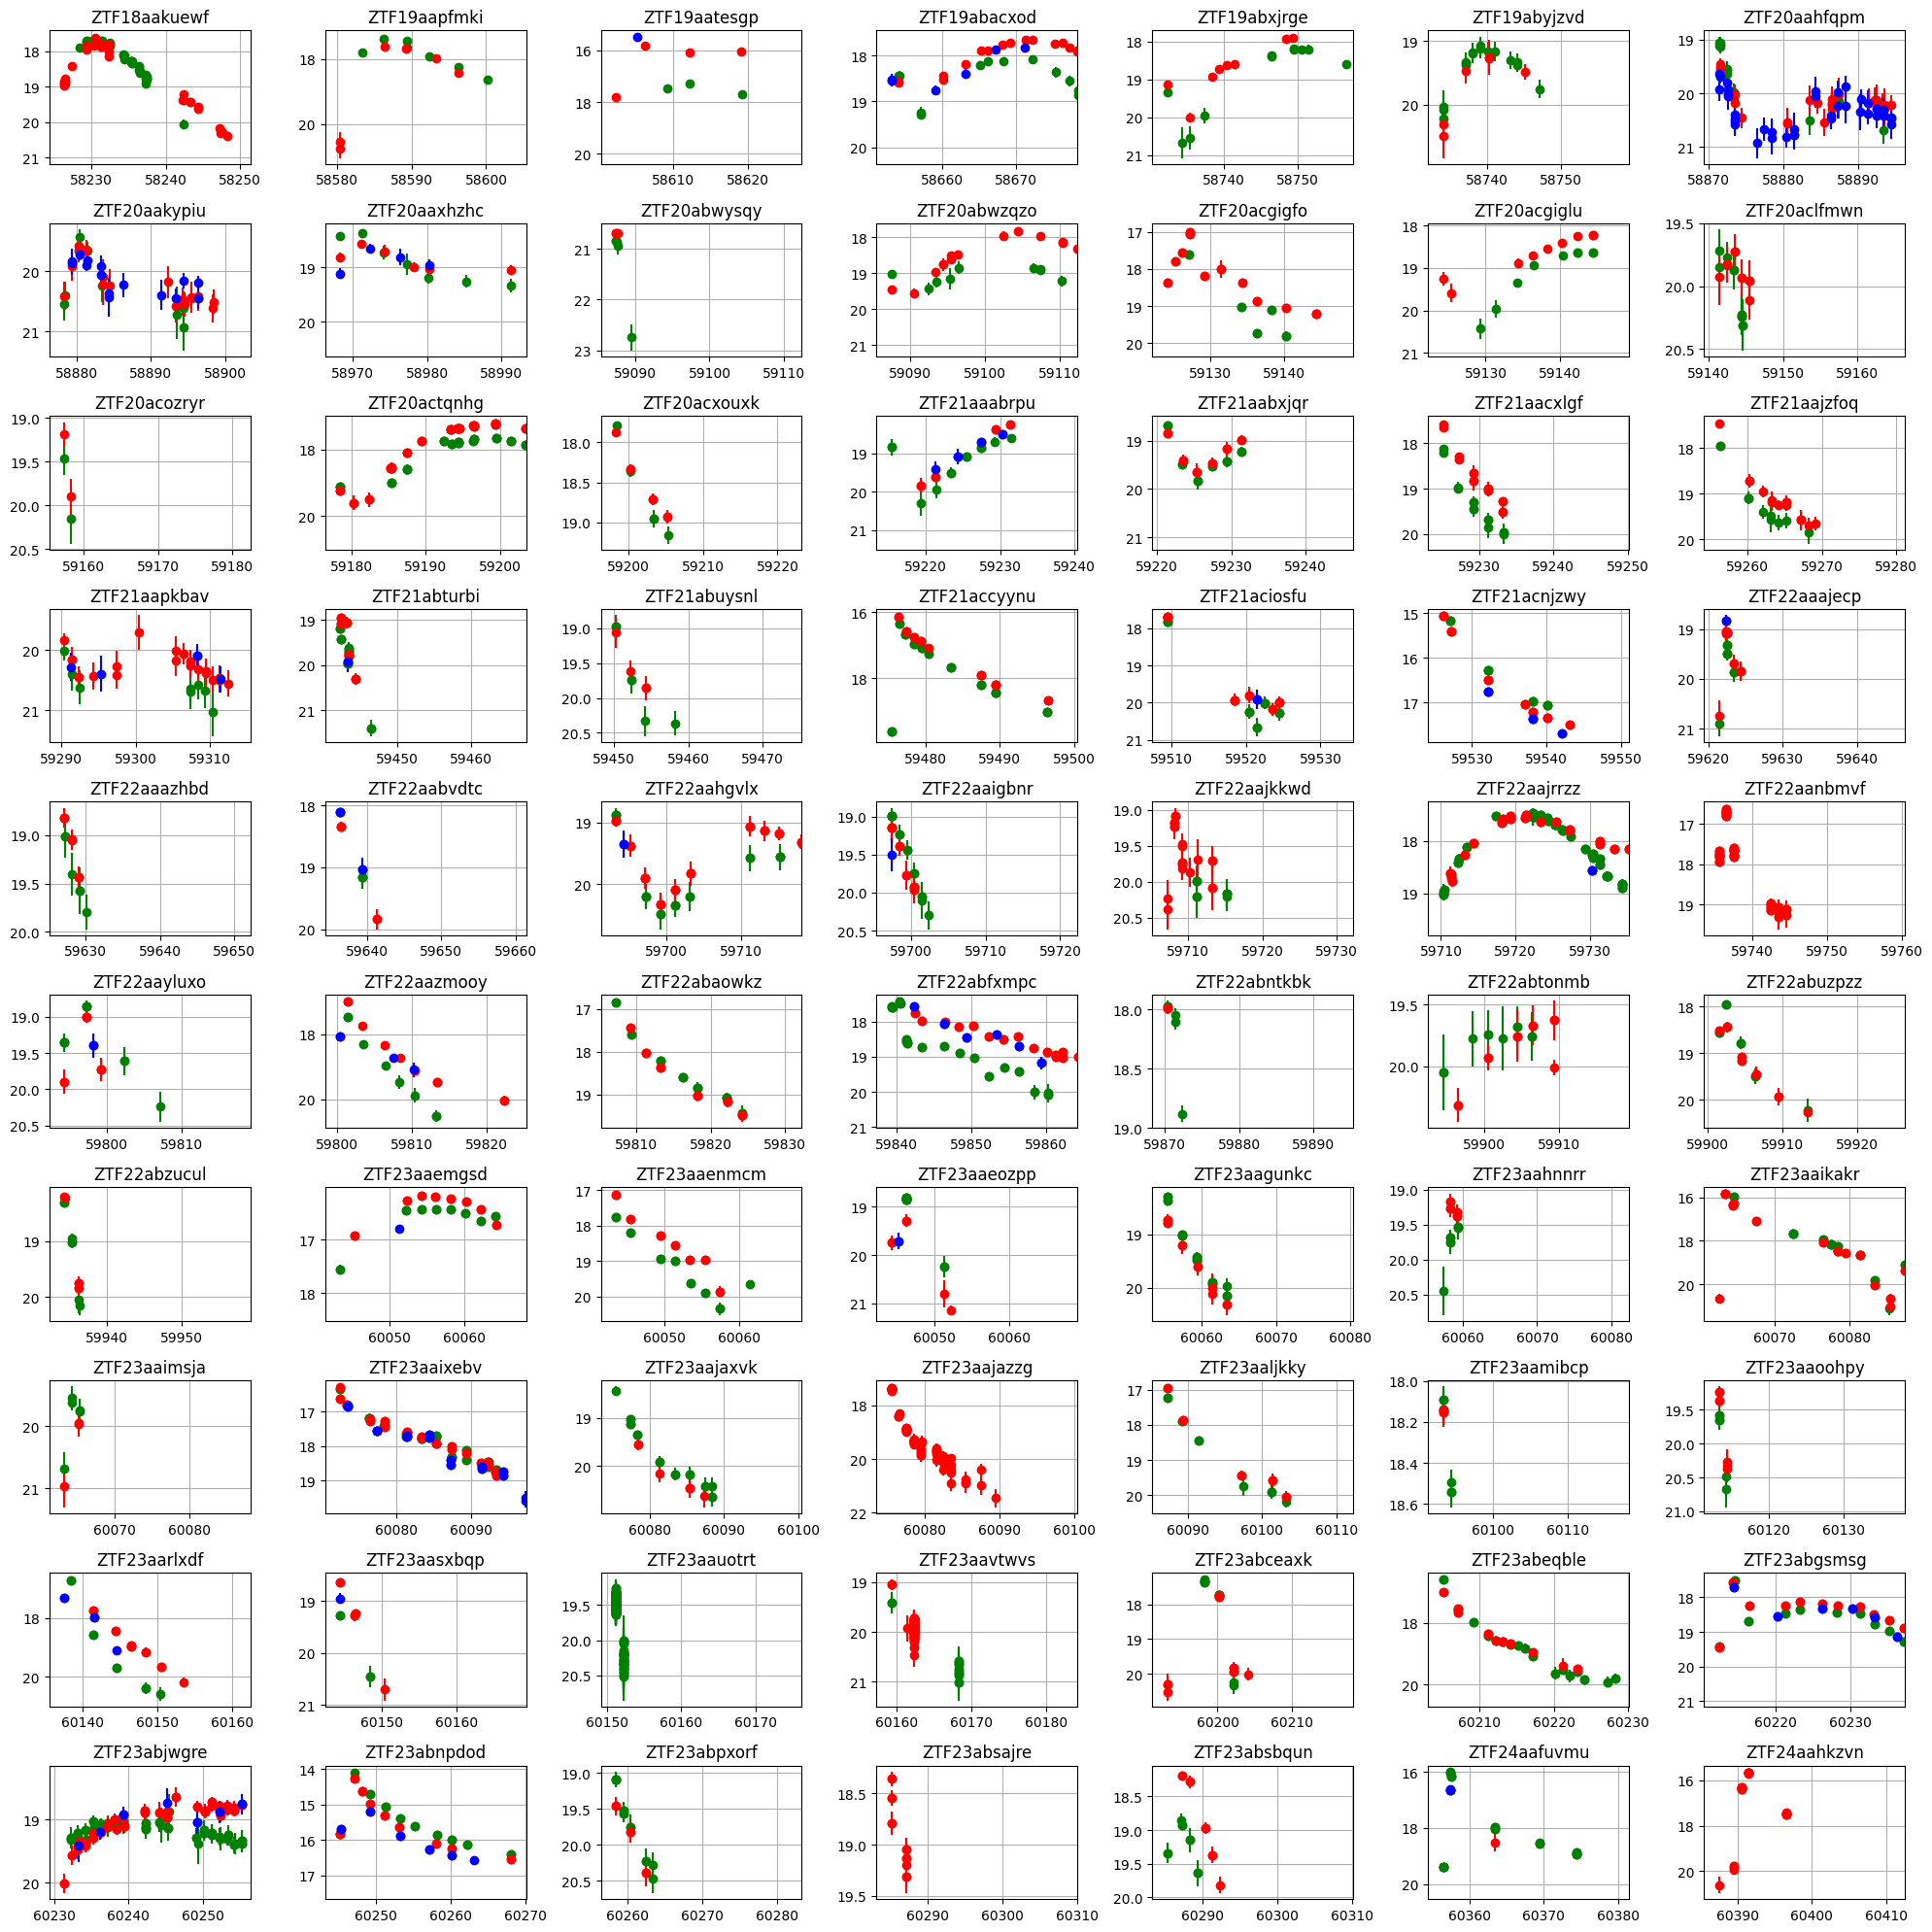

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(10,7, figsize=(20, 20))
color = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'b'}
for i, (key, value) in enumerate(bflc_dict.items()):
    ax = axs[i//7, i%7]
    min_time = value[(value['mag'].notnull())][(value['filter'] == 'ztfg') | (value['filter'] == 'ztfr') | (value['filter'] == 'ztfi')]['mjd'].min()
    ax.set_xlim(min_time-2, min_time+25)
    ax.invert_yaxis(), ax.grid()
    ax.set_title(f'{key}')
    # ax.set_xlabel('MJD')
    # ax.set_ylabel('Magnitude')
    for filt in ['ztfg', 'ztfr', 'ztfi']:
        filt_df = value[(value['filter'] == filt)  & (value['mag'].notnull())]
        if filt_df.empty:
            continue
        else:
            ax.errorbar(filt_df['mjd'], filt_df['mag'], yerr=filt_df['magerr'], fmt='o', label=filt, color=color[filt])
fig.tight_layout()
plt.show()

/tmp/ipykernel_155903/1704398830.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_time = value[(value['mag'].notnull())][(value['filter'] == 'ztfg') | (value['filter'] == 'ztfr') | (value['filter'] == 'ztfi')]['mjd'].min()


ZTF20aahfqpm has a fade rate above 0.3 in ztfg
ZTF20aahfqpm has a fade rate above 0.3 in ztfr
ZTF20abwysqy has a fade rate above 0.3 in ztfg
ZTF20acozryr has a fade rate above 0.3 in ztfg
ZTF20acozryr has a fade rate above 0.3 in ztfr
ZTF21abturbi has a fade rate above 0.3 in ztfg
ZTF21abturbi has a fade rate above 0.3 in ztfr
ZTF21abuysnl has a fade rate above 0.3 in ztfg
ZTF22aaajecp has a fade rate above 0.3 in ztfg
ZTF22aaazhbd has a fade rate above 0.3 in ztfr
ZTF22aabvdtc has a fade rate above 0.3 in ztfr
ZTF22aabvdtc has a fade rate above 0.3 in ztfi
ZTF22aayluxo has a fade rate above 0.3 in ztfr
ZTF22abfxmpc has a fade rate above 0.3 in ztfg
ZTF22abntkbk has a fade rate above 0.3 in ztfg
ZTF22abtonmb has a fade rate above 0.3 in ztfr
ZTF22abuzpzz has a fade rate above 0.3 in ztfg


/tmp/ipykernel_155903/1704398830.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  fade_rate = (last_data_point['mag'] - first_data_point['mag'])/(last_data_point['mjd'] - first_data_point['mjd'])


ZTF22abzucul has a fade rate above 0.3 in ztfg
ZTF22abzucul has a fade rate above 0.3 in ztfr
ZTF23aaeozpp has a fade rate above 0.3 in ztfr
ZTF23aaikakr has a fade rate above 0.3 in ztfr
ZTF23aamibcp has a fade rate above 0.3 in ztfg
issue with fade rate for  ZTF23aaoohpy ztfg
issue with fade rate for  ZTF23aaoohpy ztfr
ZTF23aarlxdf has a fade rate above 0.3 in ztfg
ZTF23aasxbqp has a fade rate above 0.3 in ztfr
ZTF23aauotrt has a fade rate above 0.3 in ztfg
ZTF23abceaxk has a fade rate above 0.3 in ztfg
ZTF23abceaxk has a fade rate above 0.3 in ztfr
ZTF23abgsmsg has a fade rate above 0.3 in ztfg
ZTF23abgsmsg has a fade rate above 0.3 in ztfr
ZTF23absajre has a fade rate above 0.3 in ztfr
ZTF23absbqun has a fade rate above 0.3 in ztfg
ZTF23absbqun has a fade rate above 0.3 in ztfr
ZTF24aafuvmu has a fade rate above 0.3 in ztfg
ZTF24aahkzvn has a fade rate above 0.3 in ztfr


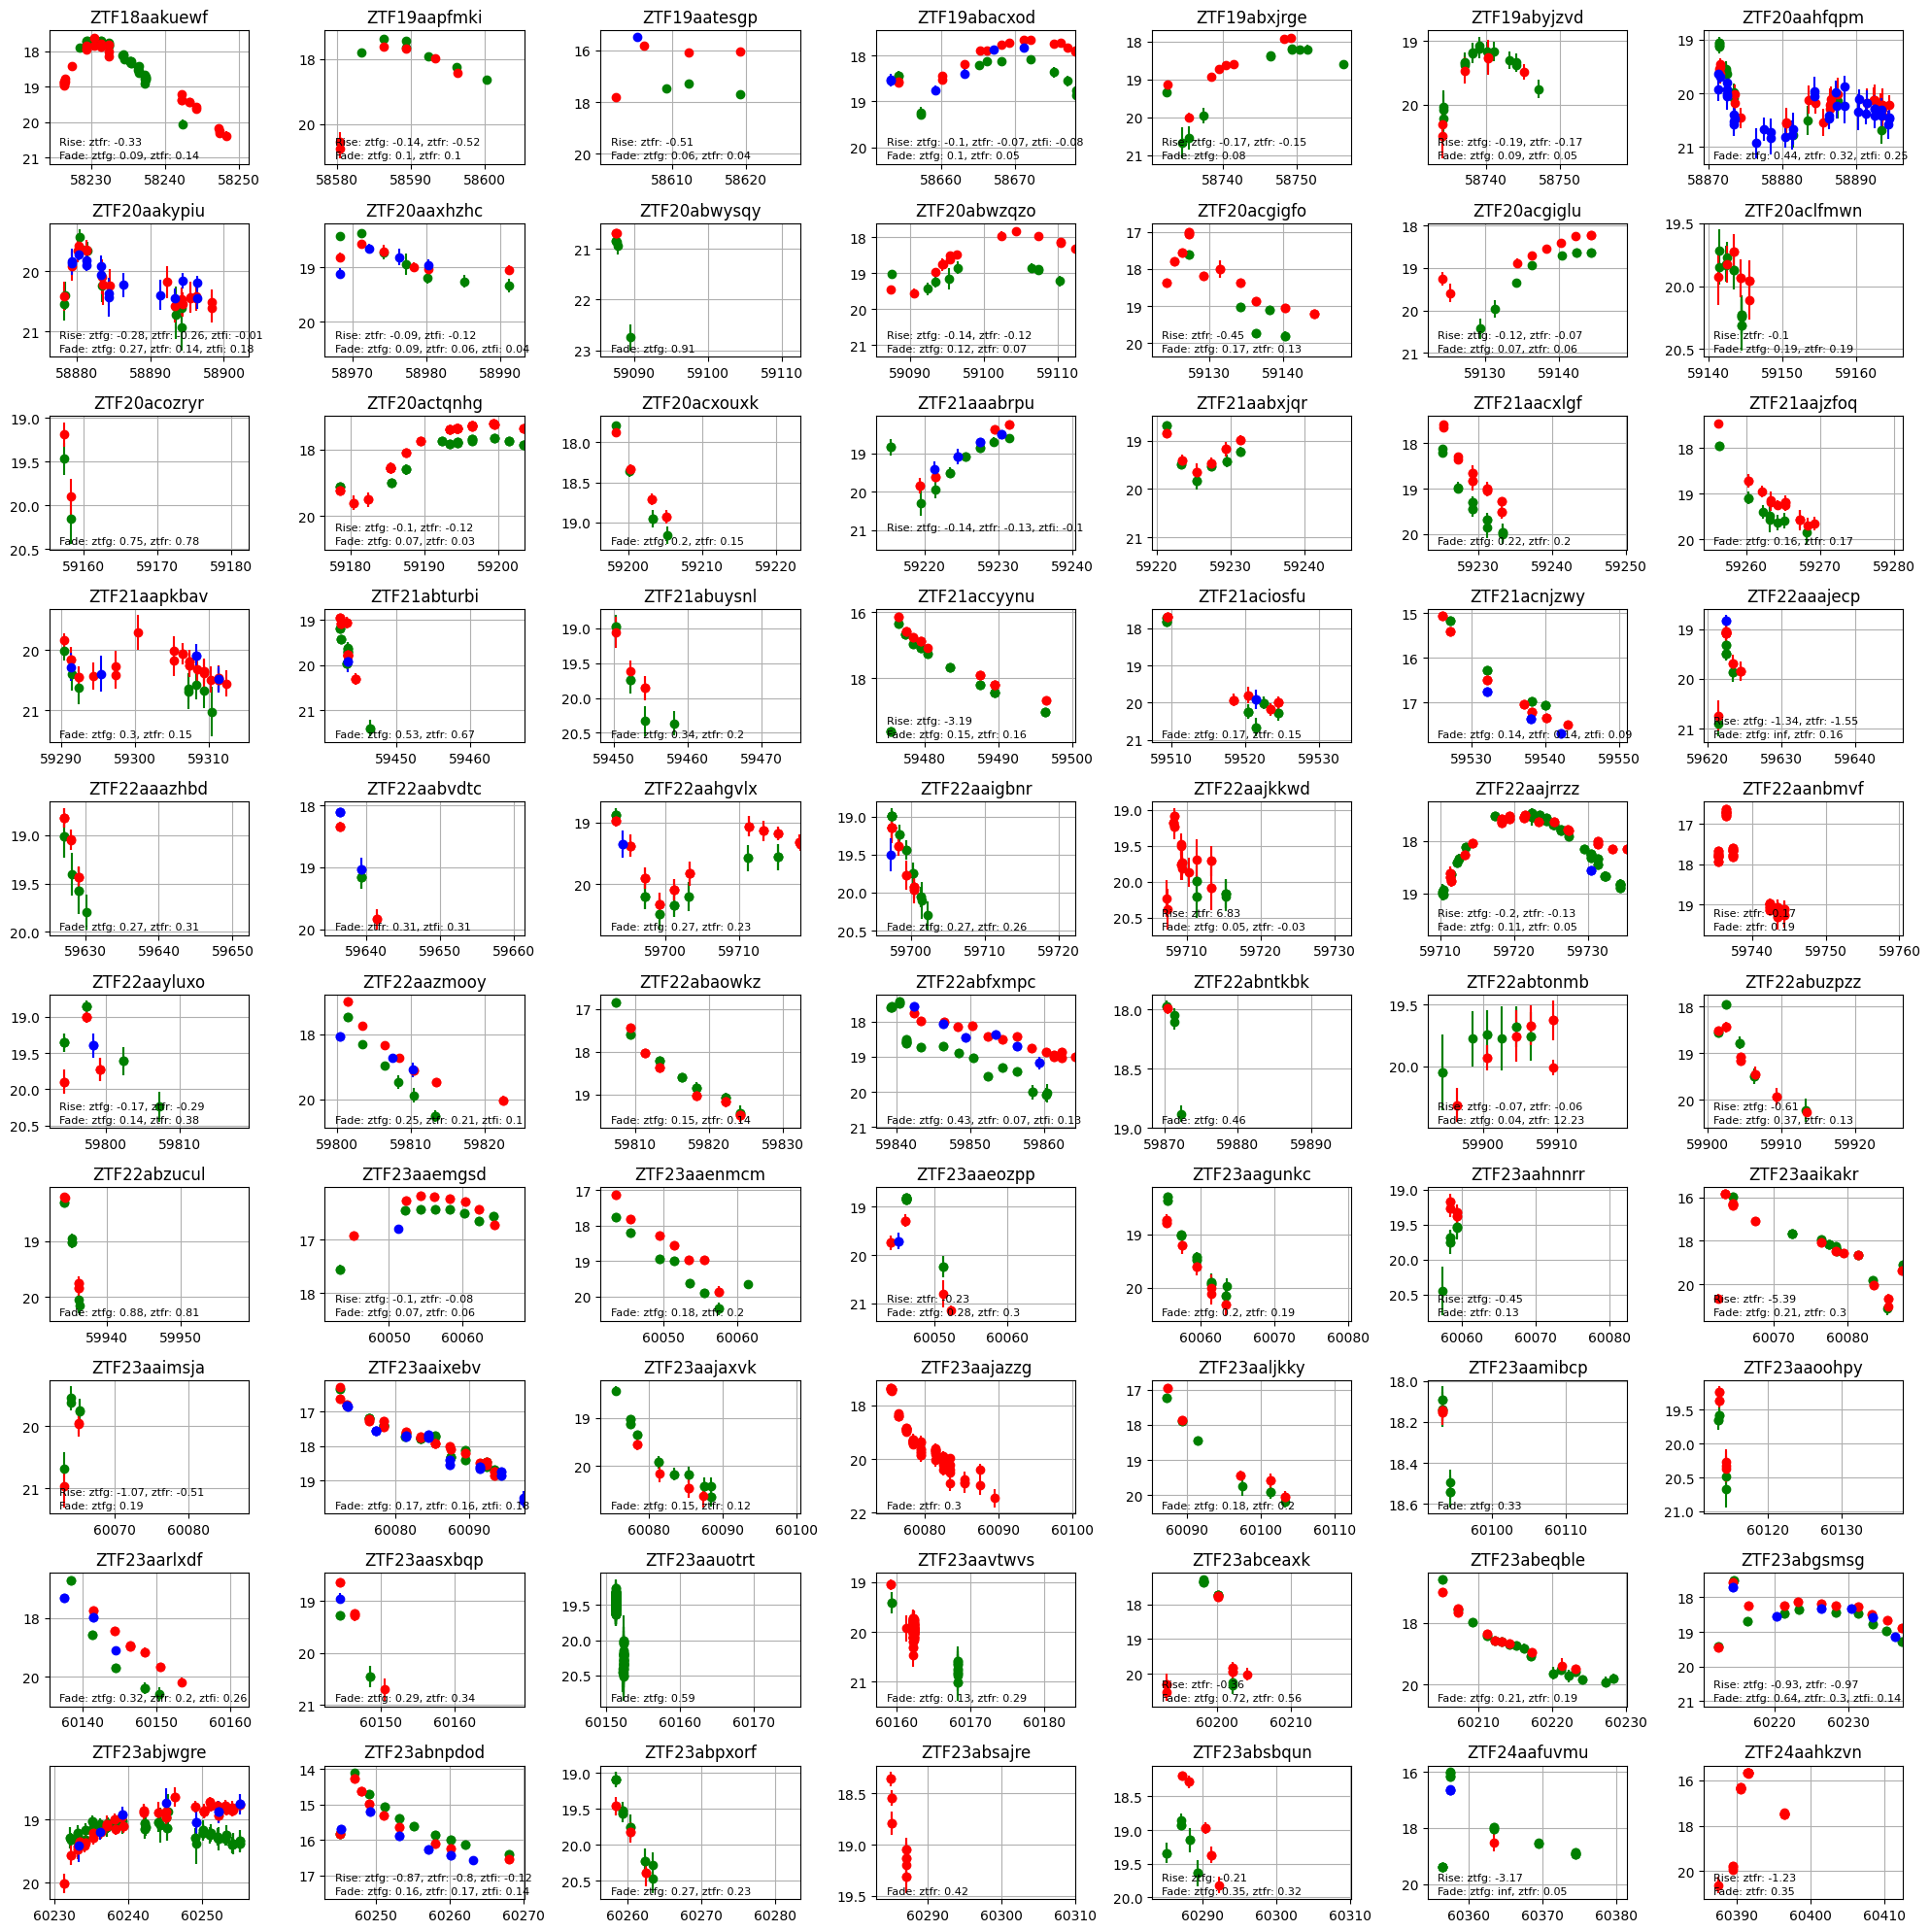

In [43]:
## plot same as above, but cross reference with the candidateEval05-30.csv file. Look for rise/fade times and use those to calculate the rise and fade rate in each band using the data within that time range. insert these as infoboxes in each of the subplots. Not all lightcurves have rises/fades in all bands, so we need to be careful about that.

import matplotlib.pyplot as plt
fig, axs = plt.subplots(10,7, figsize=(20, 20))
color = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'b'}
for i, (key, value) in enumerate(bflc_dict.items()):
    ax = axs[i//7, i%7]
    min_time = value[(value['mag'].notnull())][(value['filter'] == 'ztfg') | (value['filter'] == 'ztfr') | (value['filter'] == 'ztfi')]['mjd'].min()
    ax.set_xlim(min_time-2, min_time+25)
    ax.invert_yaxis(), ax.grid()
    ax.set_title(f'{key}')
    # ax.set_xlabel('MJD')
    # ax.set_ylabel('Magnitude')
    rise_rates = {}
    fade_rates = {}
    for filt in ['ztfg', 'ztfr', 'ztfi']:
        filt_df = value[(value['filter'] == filt)  & (value['mag'].notnull())]
        if filt_df.empty:
            continue
        else:
            ax.errorbar(filt_df['mjd'], filt_df['mag'], yerr=filt_df['magerr'], fmt='o', label=filt, color=color[filt])
        
        ## find if it has rise or fade values in the candidateEval05-30.csv file
        try:
            rise_time_range = hq_cands[hq_cands['Object'] == key][f'{filt} rise min/max'].values[0]
            if type(rise_time_range) == str:
                rise_time_range = rise_time_range.split('-')
                rise_time_range = [float(rise_time_range[0]), float(rise_time_range[1])]
                first_data_point = filt_df[filt_df['mjd'] >= rise_time_range[0]].iloc[0]
                
                last_data_point = filt_df[filt_df['mjd'] <= rise_time_range[1]].iloc[-1]
                rise_rate = (last_data_point['mag'] - first_data_point['mag'])/(last_data_point['mjd'] - first_data_point['mjd'])
                rise_rates.update({filt: round(rise_rate,2)})
                # print(rise_rate)
                # ax.text(0.05, 0.95, f'Rise rate: {rise_rate:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
        except:
            print('issue with rise rate for ', key, filt)
            pass
        try:
            fade_time_range = hq_cands[hq_cands['Object'] == key][f'{filt} fade min/max'].values[0]
            if type(fade_time_range) == str:
                fade_time_range = fade_time_range.split('-')
                fade_time_range = [float(fade_time_range[0]), float(fade_time_range[1])]
                first_data_point = filt_df[filt_df['mjd'] >= fade_time_range[0]].iloc[0]
                last_data_point = filt_df[filt_df['mjd'] <= fade_time_range[1]].iloc[-1]
                fade_rate = (last_data_point['mag'] - first_data_point['mag'])/(last_data_point['mjd'] - first_data_point['mjd'])
                fade_rates.update({filt: round(fade_rate,2)})
                # print(fade_rate)
                # ax.text(0.05, 0.95, f'Fade rate: {fade_rate:.2f}', transform=ax.transAxes, fontsize=8, verticalalignment='top')
                if fade_rate > 0.3:
                    print('{} has a fade rate above 0.3 in {}'.format(key, filt))
        except:
            print('issue with fade rate for ', key, filt)
            pass
    ## format dictionary to string for plotting
    rise_rates = ', '.join([f'{k}: {v}' for k,v in rise_rates.items()])
    fade_rates = ', '.join([f'{k}: {v}' for k,v in fade_rates.items()])
    ax.text(0.05, 0.20, f'Rise: {rise_rates}', transform=ax.transAxes, fontsize=8, verticalalignment='top') if rise_rates else None
    ax.text(0.05, 0.10, f'Fade: {fade_rates}', transform=ax.transAxes, fontsize=8, verticalalignment='top') if fade_rates else None
        
        
fig.tight_layout()
plt.show()

In [7]:
## plot each of the best candidates in a 1x3 grid for each, where each column is a different filter. each plot should have the lightcurve labeled
import matplotlib.pyplot as plt

# for key, value in bflc_dict.items():
#     color = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'b'}
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#     for i, (ax, filt) in enumerate(zip(axs, ['ztfg', 'ztfr', 'ztfi'])):
#         filt_df = value[(value['filter'] == filt)  & (value['mag'].notnull())]
#         ax.set_xlabel('MJD')
#         ax.set_ylabel('Magnitude')
#         ax.set_title(f'{key}')
#         ax.invert_yaxis()
#         if filt_df.empty:
#             continue
#         # display(filt_df)
#         ax.errorbar(filt_df['mjd'], filt_df['mag'], yerr=filt_df['magerr'], fmt='o', label=filt, color=color[filt])
#         ax.grid()
#         ax.set_xlim(filt_df['mjd'].min()-5, filt_df['mjd'].min()+30)
#         ax.legend()
#     plt.tight_layout()
#     plt.show()
